In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adultcensus/adult-census.csv
/kaggle/input/adultcensus/adult-census-numeric-test.csv


In [93]:
import pandas as pd

adult_census = pd.read_csv("../input/adultcensus/adult-census.csv")

In [94]:
# To display a diagram
from sklearn import set_config
set_config(display = "diagram")

In [95]:
# Using scikit learn documentation
X, y = adult_census.drop(columns = "class"), adult_census["class"]
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [96]:
numerical_columns = [
    "age", "capital-gain", "capital-loss", "hours-per-week"]

numeric_data = X[numerical_columns]

In [97]:
y

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numeric_data, y, random_state=42)


In [99]:
X.shape

(48842, 13)

In [100]:
y.shape

(48842,)

# Modelling Fitting with Preprocessing

In [101]:
X_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1087.077721,89.665311,40.431247
std,13.725748,7522.692939,407.110175,12.423952
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [103]:
scaler.mean_

array([  38.64235211, 1087.07772106,   89.6653108 ,   40.43124676])

In [104]:
scaler.scale_

array([  13.72556083, 7522.59025606,  407.10461772,   12.42378265])

In [105]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [106]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [107]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36631.0,-1.263553e-16,1.000014,-1.576792,-0.775367,-0.119656,0.681768,3.741752
capital-gain,36631.0,-1.708425e-15,1.000014,-0.144508,-0.144508,-0.144508,-0.144508,13.148652
capital-loss,36631.0,-1.652358e-15,1.000014,-0.220251,-0.220251,-0.220251,-0.220251,10.479701
hours-per-week,36631.0,1.146502e-16,1.000014,-3.173852,-0.034711,-0.034711,0.367743,4.714245


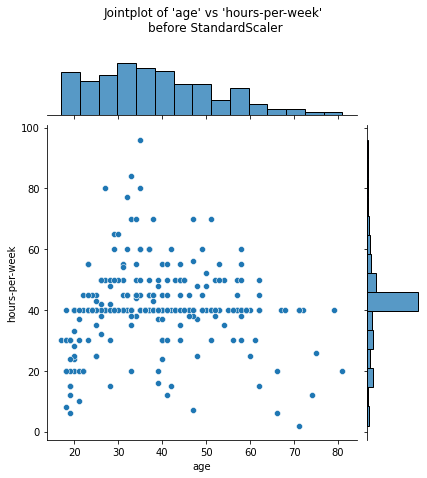

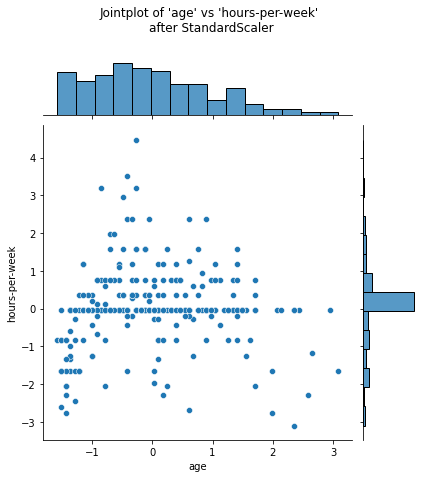

In [108]:
from matplotlib import pyplot as plt
import seaborn as sns

# number of points to visualize to have a clearer plot
num_points_to_plot = 300

sns.jointplot(data=X_train[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nbefore StandardScaler", y=1.1)

sns.jointplot(data=X_train_scaled[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nafter StandardScaler", y=1.1)

In [109]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [110]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

This predictive pipeline exposes the same methods as the final predictor:
`fit` and `predict` (and additionally `predict_proba`, `decision_function`,
or `score`).

In [111]:

start = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start

In [115]:
predicted_target = model.predict(X_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

In [116]:
model_name = model.__class__.__name__
score = model.score(X_test, y_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

The accuracy using a Pipeline is 0.807 with a fitting time of 0.142 seconds in 12 iterations


In [117]:
# Comapring the models

model = LogisticRegression()
start = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start

In [118]:
model_name = model.__class__.__name__
score = model.score(X_test, y_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model.n_iter_[0]} iterations")

The accuracy using a LogisticRegression is 0.807 with a fitting time of 0.311 seconds in 59 iterations
